In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()   # 출력용 이미지를 따로 보관합니다

# plt.imshow(img_bgr)         # opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용
# plt.show()
#푸른빛이 도는 이미지 출력


# plt.imshow 이전에 RGB 이미지로 바꿀 것.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)
# plt.show()
#원래 이미지 출력


# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# dlib은 rgb 이미지를 입력으로 받음
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)


# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   


model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
#    y = landmark[30][1] - dlib_rect.height()//2
    y = landmark[30][1] + dlib_rect.height()//2 # nose
    w = h = dlib_rect.width()

    
# 준비해 둔 스티커 이미지를 읽어서 적용
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers-rgba-1.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
# img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))

# print(img_sticker.shape)
# print(img_sticker)
# plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))
# plt.show()


refined_x = x - w // 2
refined_y = y - h
#print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
#(x,y) : (344,-98) # -값은 이미지영역 밖의 의미

rectangles[[(345, 98) (531, 284)]]
68
(437, 182)




sticker_area


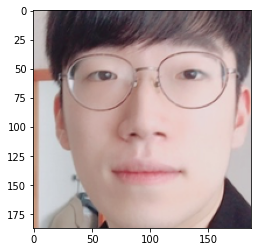



img_sticker
(187, 187, 3)


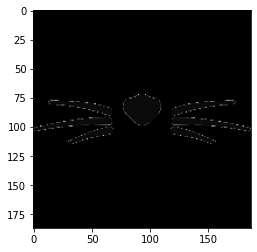

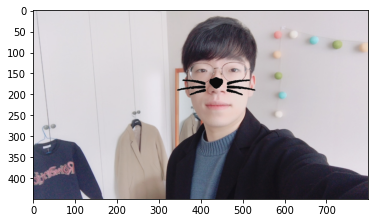

In [10]:
# 스티커가 사진영역 밖으로 나갈때 처리가 필요
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
#(x,y) : (344,0)


# 원본 이미지에 스티커를 적용
# sticker_area 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
plt.imshow(cv2.cvtColor(sticker_area, cv2.COLOR_BGR2RGB))
print('\n\nsticker_area')
plt.show()


plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))
print('\n\nimg_sticker')
print(img_sticker.shape)
plt.show()
#print(img_sticker)


sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()
#스티커가 적용된 이미지 출력

1. 주어진 '고양이 수염 이미지'(indexed color PNG) 화일 형식을 사용하는 이미지 오버레이 코드를 작성했었다. 할말은 많으나 여백이 없어서 그만 둔다.

2. RGBA 형식을 가지는 PNG 화일(cat-whiskers-rgba-1.png)을 새로 작성하고 교과과정에 있는 코드를 이용해서 마무리 했다.

3. cv2.imread 함수가 내부적으로 alpha 채널을 어떻게 처리하는지 확실하지 않아 img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)로 스티커 화일을 읽어들여 시도했지만 cv2.imread 함수가 alpha 채널을 가진 PNG 화일과 RGB 데이터만 있는 PNG 화일의 혼용을 허용하지 않아 alpha 채널을 무시하고 작업했다. 그런데도 cv2.imread 함수 내부적으로는 alpha 채널을 사용하고 있다.

4. 교과과정에 예시된 코드는 코드 이렇게 작성하면 안된다는 본보기가 되겠다. 